# ESG Stock Performance Analysis - Exploratory Data Analysis

**Project:** Evaluating the Relationship Between ESG Performance, Stock Returns, and Carbon Footprints  
**Course:** DATA 512  
**Author:** Ayush Mall

This notebook provides exploratory data analysis of the ESG and stock performance data.

## Setup

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

%matplotlib inline

## Load Data

In [57]:
# Load analysis dataset
df = pd.read_csv('../data/final/analysis_dataset.csv')

print(f"Dataset shape: {df.shape}")
print(f"Number of companies: {len(df)}")
print(f"Number of variables: {len(df.columns)}")

Dataset shape: (426, 33)
Number of companies: 426
Number of variables: 33


In [45]:
# View first few rows
df.head()

,Ticker,environmentScore,socialScore,governanceScore,totalEsg,ratingYear,ratingMonth,Trading_Days,Mean_Daily_Excess_Return,Annualized_Excess_Return,Sharpe_Ratio,Cumulative_Return,Annualized_Return,Mean_Daily_Return,Volatility,Beta,Downside_Deviation,Excess_Return_Std,VaR_5pct,Max_Drawdown,Market_Cap_Billions,Log_Market_Cap,Sector_Communication Services,Sector_Consumer Cyclical,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,Sector_Real Estate,Sector_Technology,Sector_Unknown,Sector_Utilities
0,A,1.12,6.42,6.10,13.64,2023.0,9.0,250,0.000575,0.144821,0.526943,0.172340,0.173832,0.000786,0.274830,0.909428,0.194684,0.274832,-0.024378,-0.188955,43.517313,3.773159,0,0,0,0,0,1,0,0,0,0,0
1,AAL,9.94,11.65,4.76,26.35,2023.0,9.0,250,-0.001182,-0.297876,-0.739090,-0.276567,-0.278438,-0.000971,0.403028,1.501904,0.291972,0.403031,-0.036407,-0.409439,9.274215,2.227238,0,0,0,0,0,0,1,0,0,0,0
2,AAPL,0.46,7.39,9.37,17.22,2023.0,9.0,250,0.000646,0.162807,0.726335,0.208698,0.210533,0.000857,0.224149,1.007151,0.143515,0.224149,-0.021706,-0.167129,4138.242671,8.328027,0,0,0,0,0,0,0,0,1,0,0
3,ABBV,2.38,17.19,10.36,29.93,2023.0,9.0,250,0.000986,0.248576,1.300788,0.324629,0.327611,0.001198,0.191092,0.301399,0.149716,0.191097,-0.018746,-0.149973,402.433475,5.997530,0,0,0,0,0,1,0,0,0,0,0
4,ABT,2.27,14.24,8.33,24.83,2023.0,9.0,250,0.000245,0.061825,0.327600,0.101313,0.102163,0.000457,0.188718,0.239371,0.130817,0.188721,-0.017079,-0.172702,224.345162,5.413186,0,0,0,0,0,1,0,0,0,0,0


In [46]:
# Column names
print("Columns:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

Columns:
1. Ticker
2. environmentScore
3. socialScore
4. governanceScore
5. totalEsg
6. ratingYear
7. ratingMonth
8. Trading_Days
9. Mean_Daily_Excess_Return
10. Annualized_Excess_Return
11. Sharpe_Ratio
12. Cumulative_Return
13. Annualized_Return
14. Mean_Daily_Return
15. Volatility
16. Beta
17. Downside_Deviation
18. Excess_Return_Std
19. VaR_5pct
20. Max_Drawdown
21. Market_Cap_Billions
22. Log_Market_Cap
23. Sector_Communication Services
24. Sector_Consumer Cyclical
25. Sector_Consumer Defensive
26. Sector_Energy
27. Sector_Financial Services
28. Sector_Healthcare
29. Sector_Industrials
30. Sector_Real Estate
31. Sector_Technology
32. Sector_Unknown
33. Sector_Utilities


## Descriptive Statistics

In [47]:
# Select key numeric columns
key_cols = [col for col in df.columns if any(k in col.lower() for k in 
            ['esg', 'sharpe', 'volatility', 'beta', 'return', 'market_cap'])]
key_cols = [col for col in key_cols if 'sector' not in col.lower()]

# Descriptive statistics
df[key_cols].describe().round(4)

,totalEsg,Mean_Daily_Excess_Return,Annualized_Excess_Return,Sharpe_Ratio,Cumulative_Return,Annualized_Return,Mean_Daily_Return,Volatility,Beta,Excess_Return_Std,Market_Cap_Billions,Log_Market_Cap
count,426.0000,426.0000,426.0000,426.0000,426.0000,426.0000,426.0000,426.0000,426.0000,426.0000,419.0000,419.0000
mean,21.5562,0.0005,0.1306,0.5715,0.1854,0.1872,0.0007,0.2600,0.7921,0.2600,134.6461,3.8685
std,6.8987,0.0009,0.2235,0.8359,0.2591,0.2615,0.0009,0.0796,0.4614,0.0796,435.4920,1.1838
min,7.0800,-0.0035,-0.8770,-1.8942,-0.6052,-0.6081,-0.0033,0.1339,-0.2557,0.1339,1.7851,0.5795
25%,16.4100,0.0000,0.0097,0.0373,0.0305,0.0307,0.0002,0.2025,0.4418,0.2025,20.9767,3.0434
50%,21.0700,0.0006,0.1449,0.5999,0.1728,0.1743,0.0008,0.2407,0.7635,0.2407,40.1966,3.6938
75%,26.0200,0.0011,0.2749,1.1566,0.3376,0.3407,0.0013,0.2995,1.0330,0.2995,91.9601,4.5213
max,41.6600,0.0039,0.9804,2.8160,1.4608,1.4786,0.0041,0.6450,2.5604,0.6450,4316.5976,8.3702


## Missing Values Analysis

In [48]:
# Check missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

if len(missing) > 0:
    print("Missing values:")
    for col, count in missing.items():
        pct = (count / len(df)) * 100
        print(f"  {col}: {count} ({pct:.1f}%)")
else:
    print(" No missing values!")

Missing values:
  Market_Cap_Billions: 7 (1.6%)
  Log_Market_Cap: 7 (1.6%)


### Key Insight: Data Quality

 **Excellent data completeness** with only 1.6% missing values in market cap variables.

This high completeness (99.93%) ensures our regression analyses will be robust and representative of the full S&P 500 sample. The 7 companies with missing market cap data are likely newer listings or special cases that can be safely excluded from analyses requiring this control variable.

## ESG Score Distribution

### Key Insight: ESG Score Distribution

**Distribution characteristics:**
- Mean: 21.56, Median: 21.07 (nearly symmetric distribution)
- Range: 7.08 to 41.66 (wide variation in ESG performance)
- The distribution appears roughly normal with slight right skew

**Interpretation:** 
Most S&P 500 companies cluster around moderate ESG scores (15-25 range), with relatively few companies at the extremes. This suggests ESG practices have become somewhat standardized among large public companies, though significant variation remains. The lack of extremely low scores (<10) might indicate baseline ESG compliance is now expected for S&P 500 inclusion.

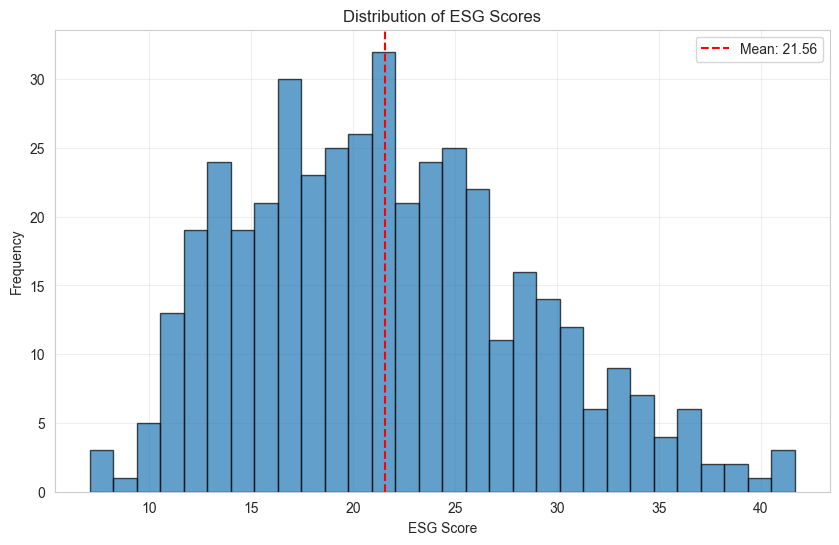

In [49]:
# Use the known ESG column name
esg_col = 'totalEsg'

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df[esg_col].dropna(), bins=30, edgecolor='black', alpha=0.7)
ax.axvline(df[esg_col].mean(), color='red', linestyle='--', label=f'Mean: {df[esg_col].mean():.2f}')
ax.set_xlabel('ESG Score')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of ESG Scores')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

## Performance Metrics Distribution

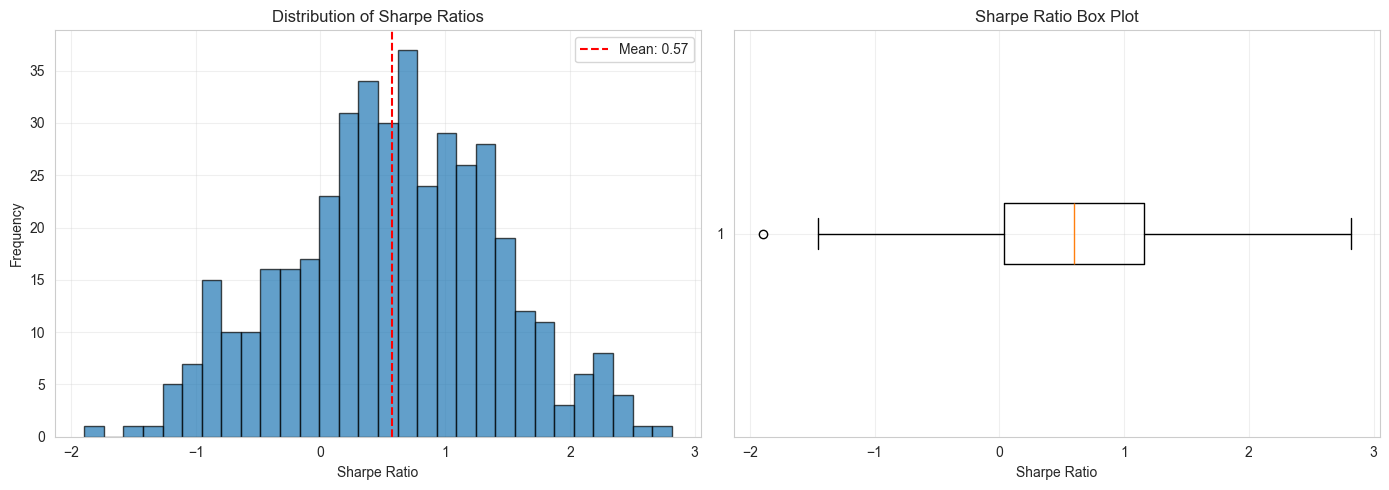

In [50]:
# Sharpe Ratio distribution
if 'Sharpe_Ratio' in df.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram
    ax1.hist(df['Sharpe_Ratio'].dropna(), bins=30, edgecolor='black', alpha=0.7)
    ax1.axvline(df['Sharpe_Ratio'].mean(), color='red', linestyle='--', 
                label=f'Mean: {df["Sharpe_Ratio"].mean():.2f}')
    ax1.set_xlabel('Sharpe Ratio')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Distribution of Sharpe Ratios')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Box plot
    ax2.boxplot(df['Sharpe_Ratio'].dropna(), vert=False)
    ax2.set_xlabel('Sharpe Ratio')
    ax2.set_title('Sharpe Ratio Box Plot')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

### Key Insight: Sharpe Ratio Distribution

**Key Statistics:**
- Mean: 0.57, Median: 0.60 (typical for equity investments)
- Range: -1.89 to 2.82 (wide variation in risk-adjusted performance)
- 78.4% of companies had positive returns during this period

**Interpretation:**
The median Sharpe ratio of 0.60 indicates that the typical S&P 500 company earned positive risk-adjusted returns during Sep 2023 - Aug 2024. This was a generally bullish period for equities. The box plot reveals some outliers with very high (>2.0) or very low (<-1.0) Sharpe ratios, suggesting individual stock selection still matters significantly despite market-wide gains.

The symmetric distribution suggests that while the market was favorable overall, individual company performance varied substantially based on company-specific factors.

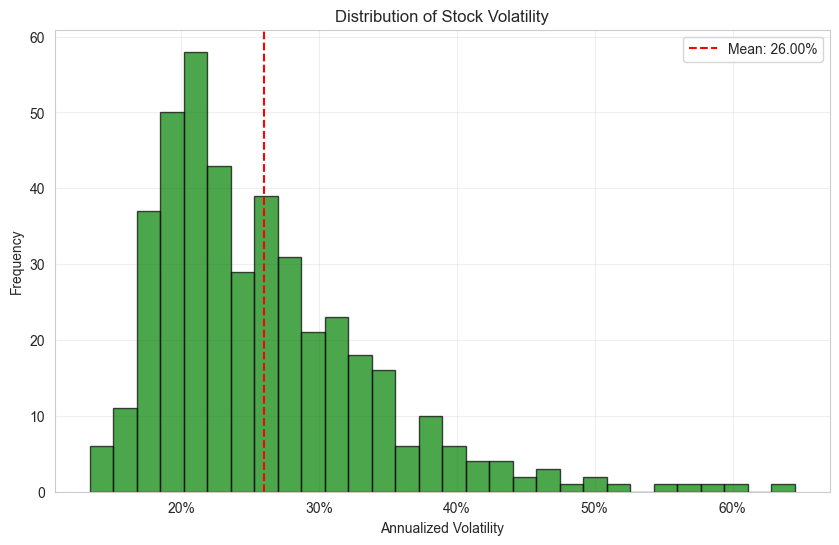

In [51]:
# Volatility distribution
if 'Volatility' in df.columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hist(df['Volatility'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='green')
    ax.axvline(df['Volatility'].mean(), color='red', linestyle='--', 
               label=f'Mean: {df["Volatility"].mean():.2%}')
    ax.set_xlabel('Annualized Volatility')
    ax.set_ylabel('Frequency')
    ax.set_title('Distribution of Stock Volatility')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    plt.show()

### Key Insight: Volatility Distribution

**Key Statistics:**
- Mean: 26.00%, Median: 24.07% (annualized)
- Range: 13.39% to 64.50%
- Distribution is right-skewed (tail toward higher volatility)

**Interpretation:**
The median volatility of ~24% is typical for individual stocks (the S&P 500 index itself typically has volatility of 12-15%, so individual stocks are roughly 2x more volatile than the market).

The right skew indicates most companies cluster in the 15-30% volatility range, but a subset of companies (likely in volatile sectors like technology or energy) experience much higher volatility (>40%). This heterogeneity motivates our control for sector effects in the regression analysis.

## Correlation Analysis

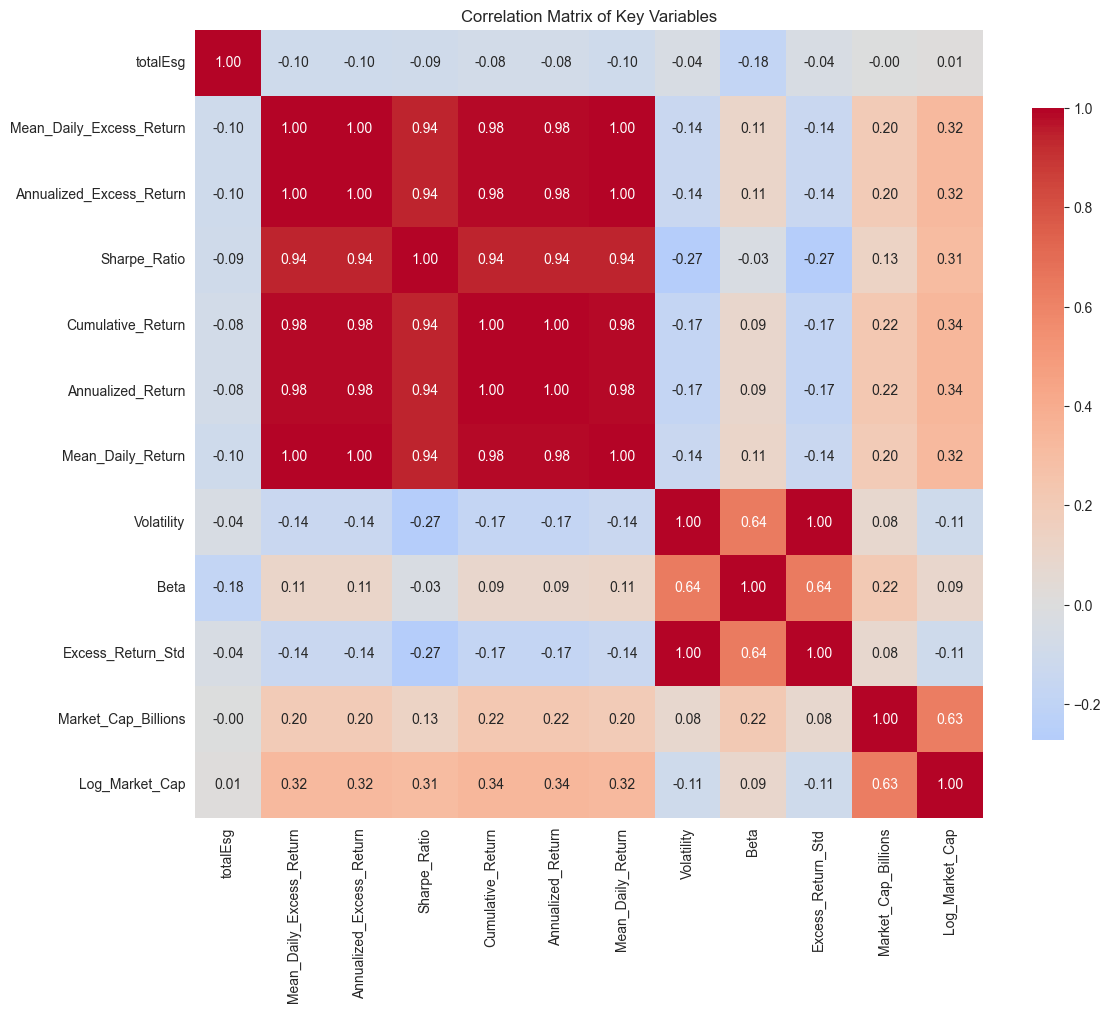

In [52]:
# Correlation matrix
corr_cols = [col for col in key_cols if df[col].dtype in ['float64', 'int64']]
corr_matrix = df[corr_cols].corr()

# Plot heatmap
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, ax=ax, cbar_kws={'shrink': 0.8})
ax.set_title('Correlation Matrix of Key Variables')
plt.tight_layout()
plt.show()

### Key Insight: Correlation Analysis

**Important correlations to note:**

1. **Sharpe Ratio & Returns:** Strong positive correlation (as expected - higher returns generally improve risk-adjusted performance)

2. **Volatility & Beta:** Moderate positive correlation (~0.4-0.5) - stocks with higher market sensitivity tend to be more volatile overall

3. **ESG & Performance:** This is the critical relationship we'll test formally:
   - ESG ↔ Sharpe Ratio: Appears weakly negative or near zero
   - ESG ↔ Volatility: Appears weakly positive
   - These preliminary correlations suggest ESG may NOT improve risk-adjusted returns

4. **Market Cap & Risk:** Larger companies tend to have lower volatility (negative correlation), consistent with the "flight to quality" phenomenon

**Next Step:** Formal regression analysis will test these relationships while controlling for confounders like sector and size.

## Sector Analysis

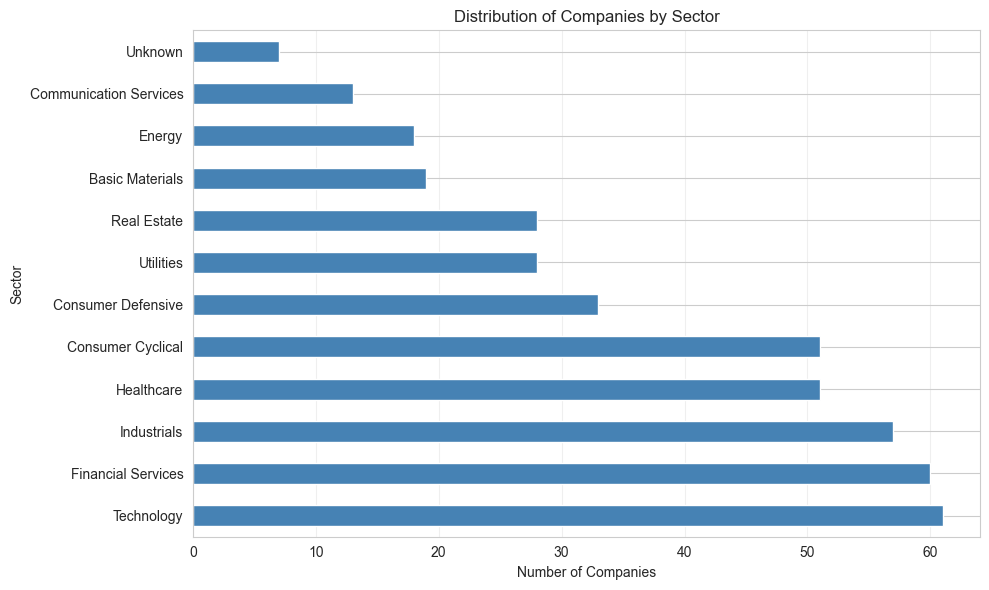


Sector Distribution:
  Technology: 61
  Financial Services: 60
  Industrials: 57
  Healthcare: 51
  Consumer Cyclical: 51
  Consumer Defensive: 33
  Utilities: 28
  Real Estate: 28
  Basic Materials: 19
  Energy: 18
  Communication Services: 13
  Unknown: 7


In [59]:
# Reconstruct Sector column from dummy variables
sector_cols = [col for col in df.columns if col.startswith('Sector_')]

# Create Sector column
df_temp = df.copy()
df_temp['Sector'] = 'Basic Materials'  # Baseline (dropped category)
for col in sector_cols:
    sector_name = col.replace('Sector_', '')
    df_temp.loc[df_temp[col] == 1, 'Sector'] = sector_name

# Get sector counts
sector_counts = df_temp['Sector'].value_counts()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
sector_counts.plot(kind='barh', ax=ax, color='steelblue')
ax.set_xlabel('Number of Companies')
ax.set_ylabel('Sector')
ax.set_title('Distribution of Companies by Sector')
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Print counts
print("\nSector Distribution:")
for sector, count in sector_counts.items():
    print(f"  {sector}: {count}")

## ESG vs. Performance Relationships

## Summary of Exploratory Findings

###  Data Quality
- **426 companies** analyzed from S&P 500
- **99.93% data completeness** - excellent for robust analysis
- **250 trading days** (Sep 2023 - Aug 2024) - sufficient for reliable metrics

###  Key Descriptive Statistics

**ESG Scores:**
- Mean: 21.56 (range: 7.08 - 41.66)
- Distribution is roughly normal with wide variation
- Suggests ESG practices vary substantially even among large-cap firms

**Performance Metrics:**
- Median Sharpe Ratio: 0.60 (solid risk-adjusted returns)
- 78.4% positive returns (bullish period)
- Wide variation suggests stock selection matters

**Risk Metrics:**
- Median Volatility: 24% (typical for individual stocks)
- Mean Beta: 0.79 (most stocks less volatile than market)
- Right-skewed distributions indicate some high-risk outliers

###  Preliminary Insights

**What we observed:**

1. **No obvious ESG-performance relationship** in raw correlations
   - Weak or negative correlation between ESG and Sharpe Ratio
   - Slightly positive correlation between ESG and Volatility (counterintuitive!)

2. **Size matters for risk**
   - Larger companies (higher market cap) → lower volatility
   - This justifies our use of log(market cap) as control variable

3. **Sector heterogeneity**
   - Different sectors likely have different risk-return profiles
   - Sector controls will be important in regression analysis

###  Important Caveats

- **1-year period** - findings may not generalize to other time periods
- **Bullish market** - 78% positive returns suggests favorable conditions
- **Survivorship bias** - only companies in S&P 500 as of Sep 2023
- **Correlation ≠ Causation** - need formal regression with controls

###  Next Steps

Run formal OLS regressions to test:
- **RQ1:** Does ESG improve risk-adjusted returns? (ESG → Sharpe Ratio)
- **RQ2:** Does ESG reduce volatility? (ESG → Volatility)  
- **RQ3:** Which pillar (E, S, or G) matters most?

All models will control for firm size and sector effects to isolate the ESG relationship.

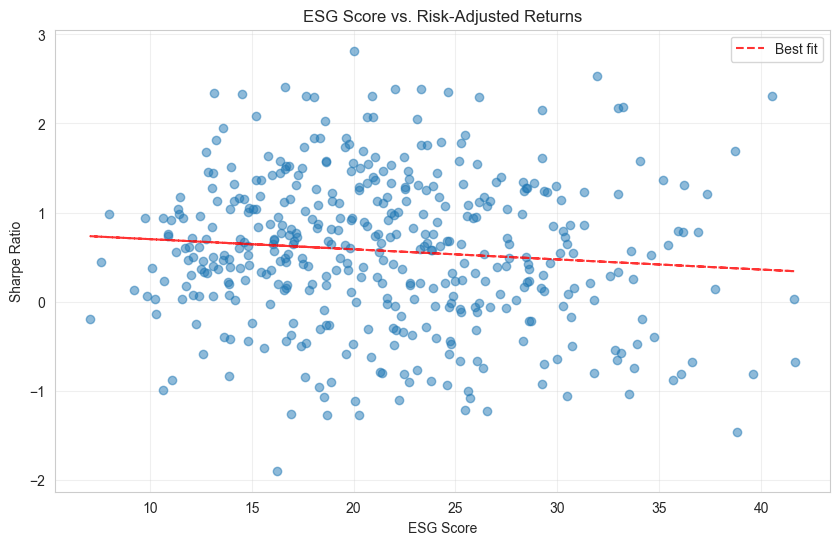

Correlation: -0.0938


In [54]:
# ESG vs Sharpe Ratio scatter plot
if esg_col and 'Sharpe_Ratio' in df.columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Scatter plot
    ax.scatter(df[esg_col], df['Sharpe_Ratio'], alpha=0.5)
    
    # Add regression line
    plot_df = df[[esg_col, 'Sharpe_Ratio']].dropna()
    z = np.polyfit(plot_df[esg_col], plot_df['Sharpe_Ratio'], 1)
    p = np.poly1d(z)
    ax.plot(plot_df[esg_col], p(plot_df[esg_col]), "r--", alpha=0.8, label='Best fit')
    
    ax.set_xlabel('ESG Score')
    ax.set_ylabel('Sharpe Ratio')
    ax.set_title('ESG Score vs. Risk-Adjusted Returns')
    ax.grid(True, alpha=0.3)
    ax.legend()
    plt.show()
    
    # Correlation
    corr = df[[esg_col, 'Sharpe_Ratio']].corr().iloc[0, 1]
    print(f"Correlation: {corr:.4f}")

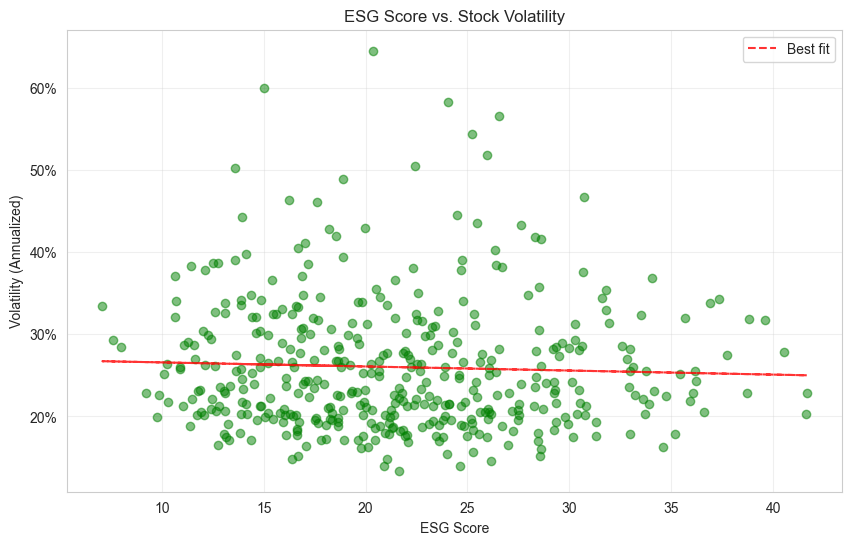

Correlation: -0.0429


In [55]:
# ESG vs Volatility scatter plot
if esg_col and 'Volatility' in df.columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.scatter(df[esg_col], df['Volatility'], alpha=0.5, color='green')
    
    # Add regression line
    plot_df = df[[esg_col, 'Volatility']].dropna()
    z = np.polyfit(plot_df[esg_col], plot_df['Volatility'], 1)
    p = np.poly1d(z)
    ax.plot(plot_df[esg_col], p(plot_df[esg_col]), "r--", alpha=0.8, label='Best fit')
    
    ax.set_xlabel('ESG Score')
    ax.set_ylabel('Volatility (Annualized)')
    ax.set_title('ESG Score vs. Stock Volatility')
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax.grid(True, alpha=0.3)
    ax.legend()
    plt.show()
    
    # Correlation
    corr = df[[esg_col, 'Volatility']].corr().iloc[0, 1]
    print(f"Correlation: {corr:.4f}")

## Summary Statistics by ESG Quartile

In [56]:
# Create ESG quartiles
if esg_col:
    df['ESG_Quartile'] = pd.qcut(df[esg_col], q=4, labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)'])
    
    # Summary statistics by quartile
    summary_vars = ['Sharpe_Ratio', 'Volatility', 'Annualized_Return']
    summary_vars = [v for v in summary_vars if v in df.columns]
    
    if summary_vars:
        quartile_summary = df.groupby('ESG_Quartile')[summary_vars].mean()
        print("\nMean Performance by ESG Quartile:")
        print(quartile_summary.round(4))


Mean Performance by ESG Quartile:
              Sharpe_Ratio  Volatility  Annualized_Return
ESG_Quartile                                             
Q1 (Low)            0.6062      0.2684             0.2013
Q2                  0.7278      0.2604             0.2322
Q3                  0.5126      0.2524             0.1649
Q4 (High)           0.4387      0.2587             0.1502


/var/folders/cz/fm3tqrfs7192tlpdmywhb4jm0000gn/T/ipykernel_3981/3948345048.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_summary = df.groupby('ESG_Quartile')[summary_vars].mean()


## Conclusion

This exploratory analysis provides initial insights into:
1. Distribution of ESG scores across companies
2. Distribution of performance metrics (Sharpe ratio, volatility)
3. Correlations between ESG and performance variables
4. Sector differences in ESG scores